# Notebook 2:  Clustering con GMM y Algoritmos Jerárquicos

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [ ]:
install.packages('mclust')

In [1]:
library(mclust)
library(cluster)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

Package 'mclust' version 5.4.6
Type 'citation("mclust")' for citing this R package in publications.


     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 4 components: 

 log-likelihood  n df       BIC       ICL
      -129.0138 25 71 -486.5678 -486.5782

Clustering table:
1 2 3 4 
5 8 7 5 

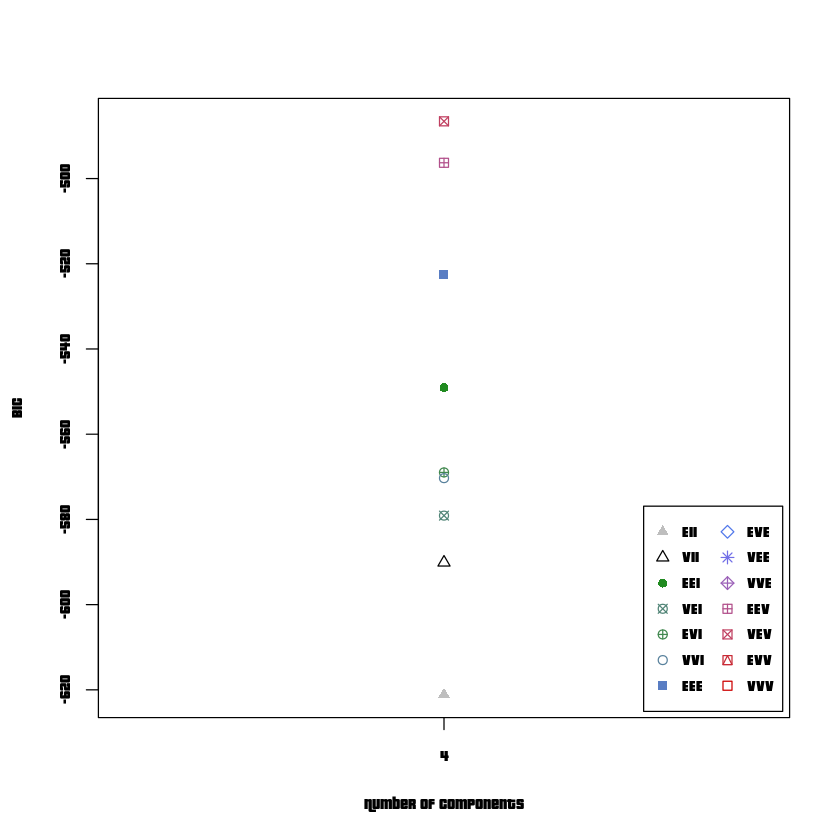

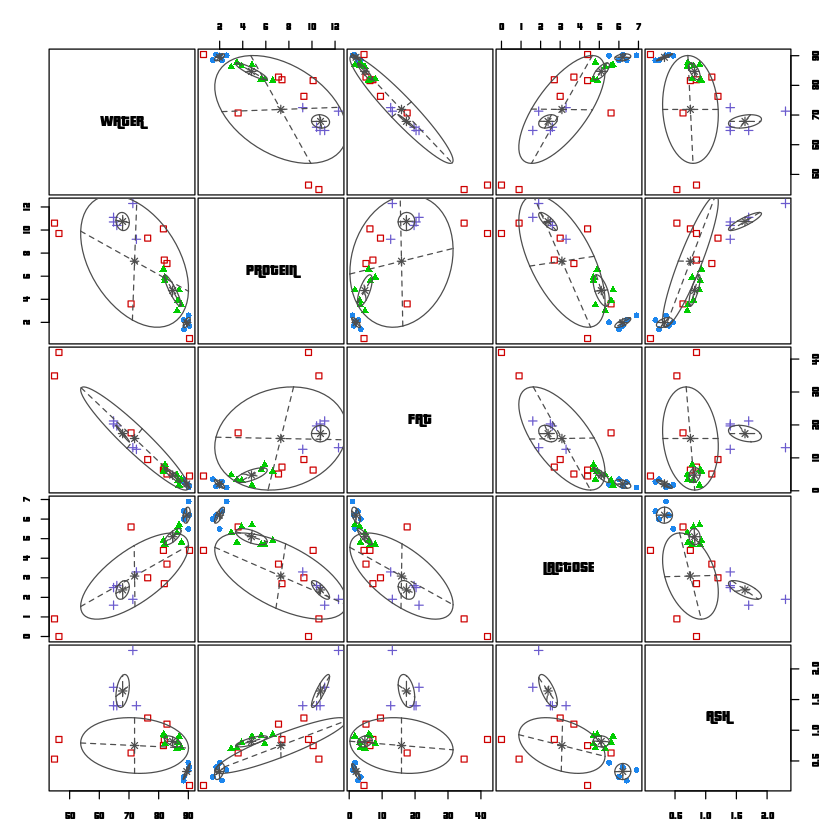

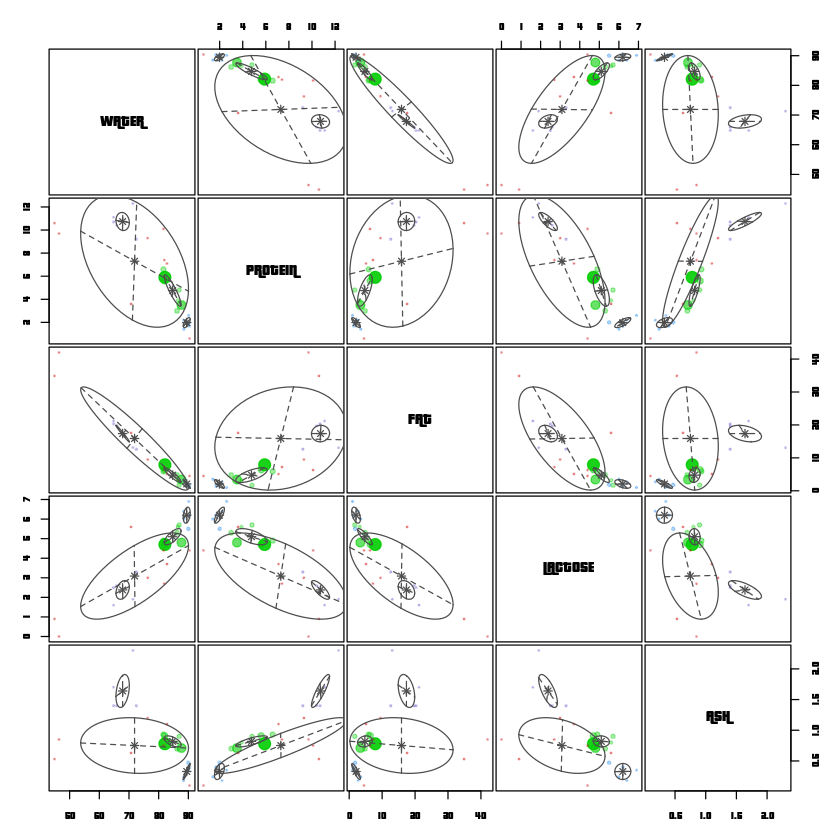

'Mclust' model object: (VEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
89.45999,1.980001,2.080005,6.200009,0.3279979
71.88271,7.298580,15.881214,3.088610,0.7512686
84.71493,4.756873,4.756149,5.100211,0.8185953
67.86000,10.740002,17.380003,2.379999,1.6400005


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          2          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          2          2          3          3          1          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          4          4          4 
  REINDEER      WHALE       SEAL    DOLPHIN 
         4          4          2          2

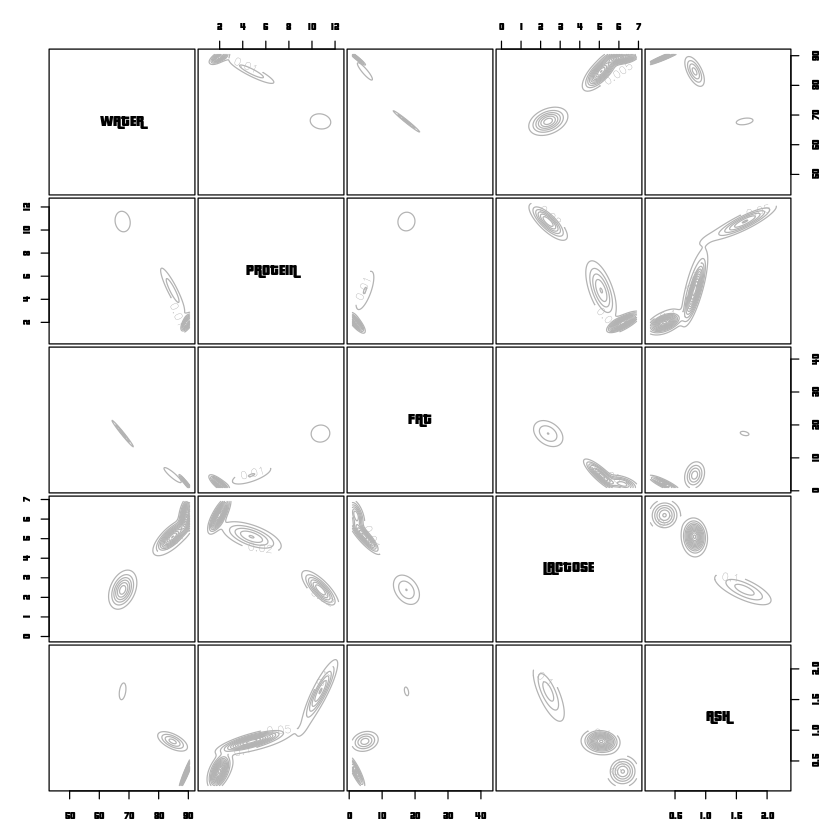

In [2]:
clus <-Mclust(datos,4)
summary(clus)
plot(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl

Ejercicio 1: 
a) Explique como funciona el método Mclust, describa parámetros de entrada y salida.
b) Interprete y comente los resultados obtenidos. 

El metodo **Mclust** es un modelo de clustering basado en modelos de mezcla gaussiana finita parametrizada. Estos modelos son estimados por el algoritmo EM inicializado por un clustering aglomerativo basado en modelos jerarquicos

<h5>Tabla de parametros</h5>

|Parametros|Descripcion
|---|---|
|data|Un vector numerico, matriz, o dataframe de observaciones. No permite variables categoricas|
|G|Un vector entero especificando el numero de clusters para los cuales el BIC es calculado|
|modelNames|Un vector de strings indicando los modelos para ser ajustados en la fase EM del clustering|
|prior|Este argumento permita la especificacion de prior en las media y varianzas meduante la funcion *priorControl*|
|control|Una lista de parametros de control para EM|
|initialization|Una lista que contiene cero o mas componentes(eg: hcPairs,subset,noise)|
|warn|Un valor logico que indica si puede o no arrojar alertas|
|x|Un objeto de la clase *mclustBIC*, si *x* es entregado, los valores BIC para los modelos que ya fueron computados y disponibles en *x* no son recomputados|
|verbose|Valor boolenao para hacer la sesion interactiva|

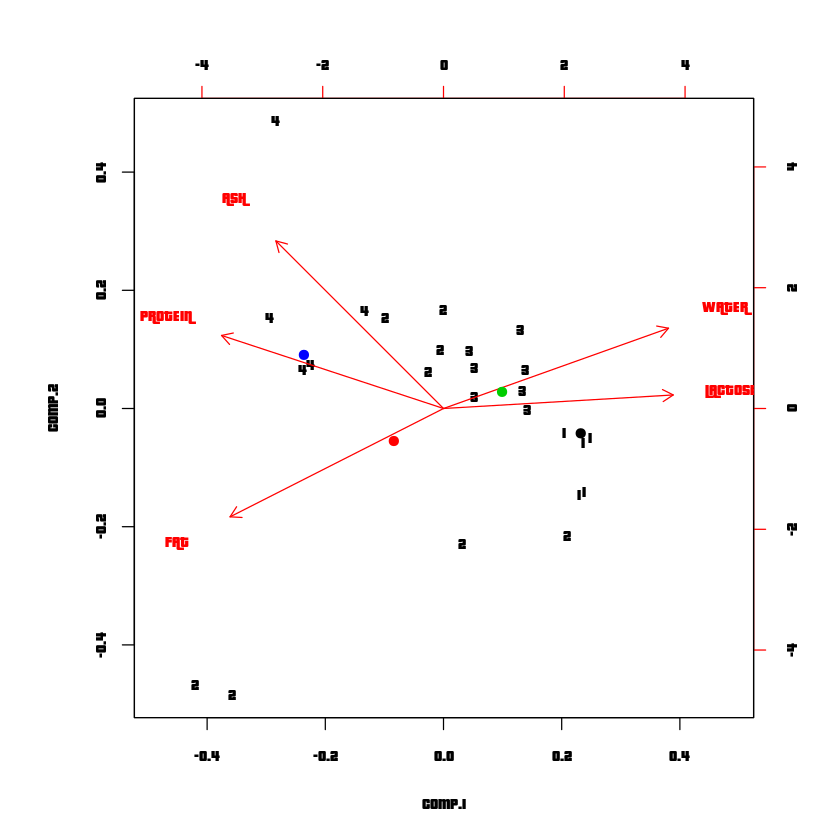

In [3]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


**Criterio de Información Bayesiano**

Una forma de discriminar entre posibles agrupamientos, es calcular el Criterio de Información Bayesiano, cuya expresión genérica es:
$$BIC = log(Datos\mid \hat{\theta}) - \frac{d}{2}log(N)$$
donde $d$ es el número de parámetros libres y $N$ el número de observaciones. A medida que aumenta el número de parámetros la verosimilitud aumenta, pero esto es moderado por el término en que depende de $d$.

Mclust calcula automática el BIC para distintas configuraciones de las matrices covarianza de cada Normal multivariada (que corresponden a distintos números de parámetros) así como distinto número de grupos. Por parsimonia, es recomendable escoger el primer número de grupos que representa un máximo local.

Ejercicio 2: 

a) Utilice Mclust sin definir el número de grupos y considere el Criterio de información Bayesiano (BIC) para decidir el número de grupos óptimo. 

b) Discuta y compare  sus resultados con aquellos obtenidos con k-means

In [4]:
#A)
clus <-Mclust(datos)
summary(clus)
clus$BIC

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 9 components: 

 log-likelihood  n  df       BIC       ICL
       69.49069 25 148 -337.4122 -337.4122

Clustering table:
1 2 3 4 5 6 7 8 9 
3 3 6 3 2 1 1 4 2 

Bayesian Information Criterion (BIC): 
        EII       VII       EEI       VEI       EVI       VVI       EEE
1 -877.3077 -877.3077 -687.8770 -687.8770 -687.8770 -687.8770 -515.1787
2 -780.2343 -723.7110 -620.9298 -610.8101 -607.5181 -603.7396 -519.1382
3 -670.9889 -670.5790 -605.1899 -601.0542 -611.1621 -603.1116 -519.2004
4 -621.1325 -590.1162 -549.0732 -579.1088 -568.9724 -570.3147 -522.5657
5 -639.4138 -597.0054 -560.8801 -553.4249 -564.0002 -579.7319 -519.5430
6 -605.6767        NA -542.0338 -553.9953 -582.9864 -553.7722 -507.6386
7 -624.9549        NA -533.6743        NA        NA        NA -528.7297
8 -576.9534        NA -543.0896        NA        NA        NA -504.5347
9 -587.1171        NA -550.7857        NA        NA        NA -494.9635
        EVE       VEE       VVE       EEV       VEV       EVV       VVV
1 -515.1787 -515.1787 -515.1787 -515.1787 -515.1787 -515.1787 -515.1787
2 -521.9922 -490.1068 -504.9436 -495.6500 -496.7253 -481.8633 -512.9962
3        NA        NA    

Segun el BIC, el numero de grupos óptimo es 9, esto contrasta con el número de grupos obtenido usando el método de K-means, el cual nos indica que el número de grupos era 3. Esto puede deberse a una de las limitaciones de BIC, que dice que el número de muestras de ser muy superior al número de características para ser realmente confiable.

En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico

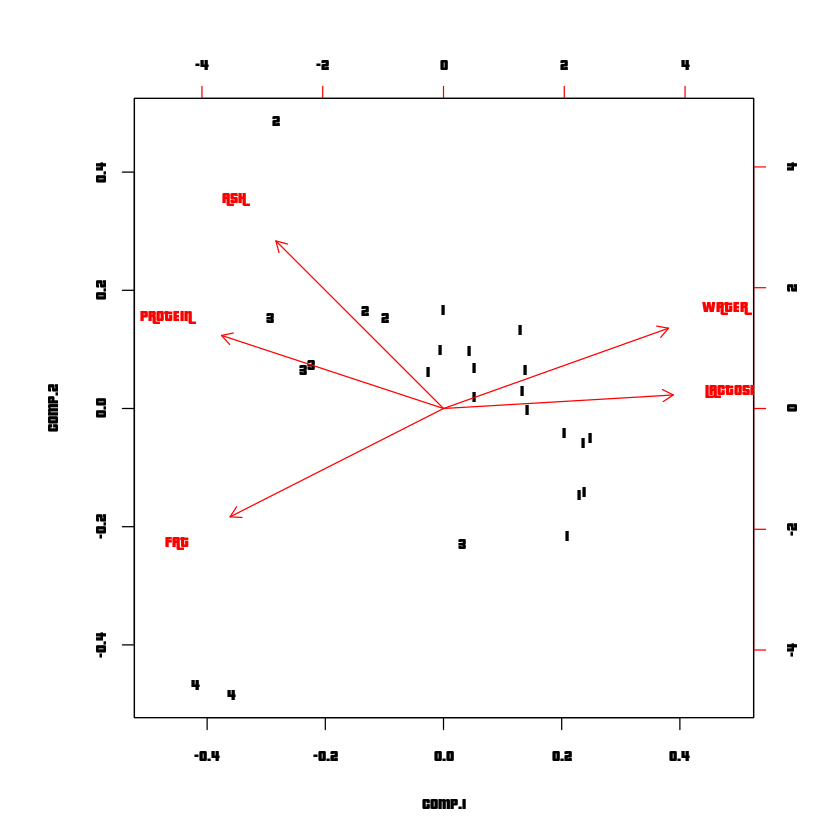

In [5]:
res3 <- hclust(dist(datos))
biplot(res, xlabs= cutree(res3,4))

Ejercicio 3: 

a) Explique como funciona el método hclust, describa parámetros de entrada y salida.

b) Interprete y comente los resultados obtenidos. 

c) Utilice otros parámetros en hclust y discuta como varían los resultados. 

<h6>a)</h6>
hclust hace un analisis de agrupamiento jerárquico usando un set de dissimilaridades para los $n$ objetos a ser clasificados. Inicialmente, cada objeto es asignado a su propio cluster y luego, iterativamente, el algoritmo une los dos cluster más similares, hasta que quede sólo un cluster. En cada etapa las distancias entre los cluster son recalculadas por la formula de Lance-Williams de acuerdo al método de agrupación usado.

|Parametros|Descripcion|
|---|---|
|d|Una estructura dissimilar|
|method|El metodo de agrupacion a usar (single, complete, average, etc.)|
|members|Null o un vector del tamaño de *d*|
|x|Un objecto del tipo producido por hclust|
|hang|La porción de la altura del grafico de la que deberian colgar las etiquetas|
|check| argumento logico que indica si el objeto *x* debe ser validado|
|labels|Un vector de caracteres de etiquetas para las hojas del árbol. Por default los nombres de las filas|


<h6>b)</h6>


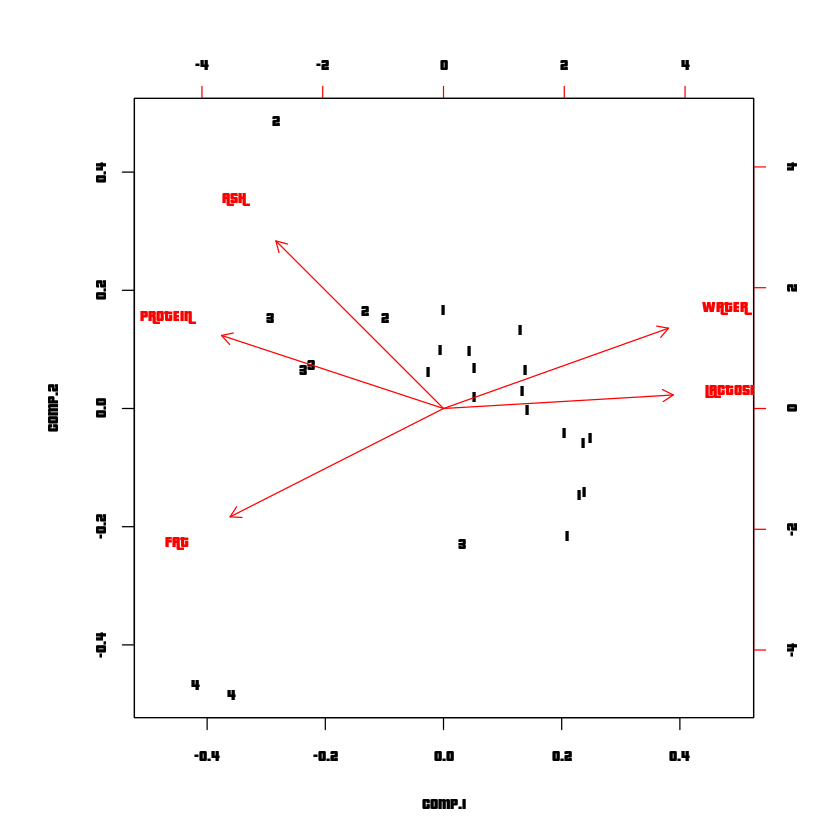

In [6]:
#C)
res3 <- hclust(dist(datos), method='complete') #No aceptó otros parámetros
biplot(res, xlabs= cutree(res3,4))

No hay variacion en los resultados

Ejercicio 4: 

a) Realice un análisis de clustering con Kmeans, GMM y Análisis Jerárquico para el conjunto de datos iris.csv. Interprete sus resultados.

b) Estudie las medidas de calidad propuestas en Murphy, Capítulo 25: purity, rand index y mutual information (pdf en siveducMD). Calcule alguna de las medidas de calidad estudiadas, para cada uno de los análisis realizado en (a). Discuta sus resultados.

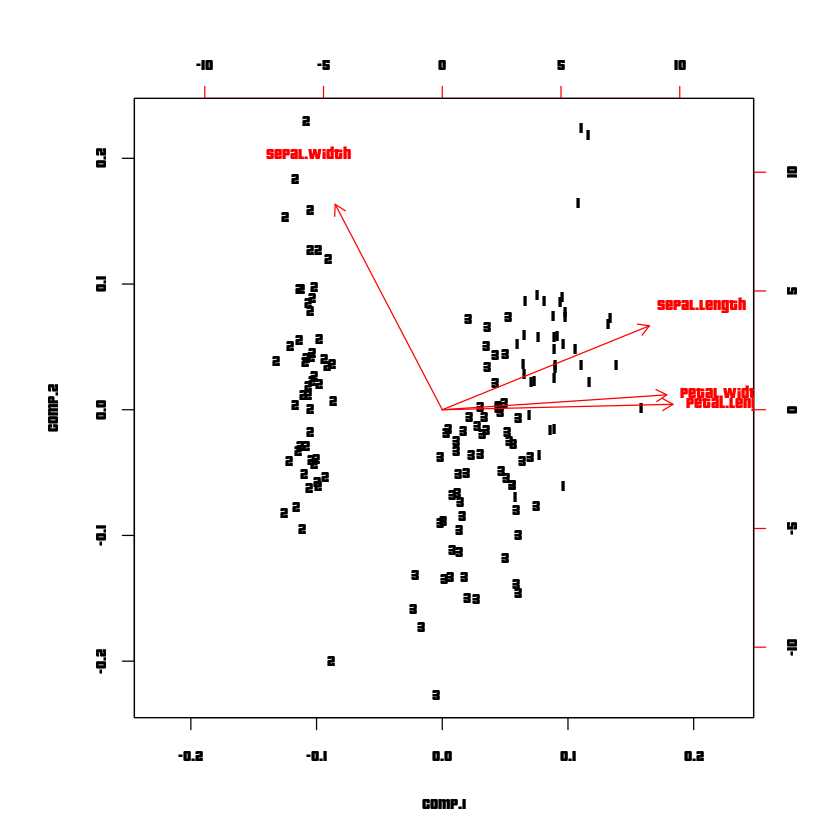

In [10]:
#A)
dt<-read.csv2("iris.csv",header=TRUE,sep=";")
dataset <- dt[1:4]
class <- dt[5]
#KMEANS
k<-3
cluster_iris<-kmeans(dataset,k,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
comp <- princomp(dataset, cor=TRUE)
flower_pred <- predict(comp,cluster_iris$centers)
biplot(comp,xlabs=cluster_iris$cluster)

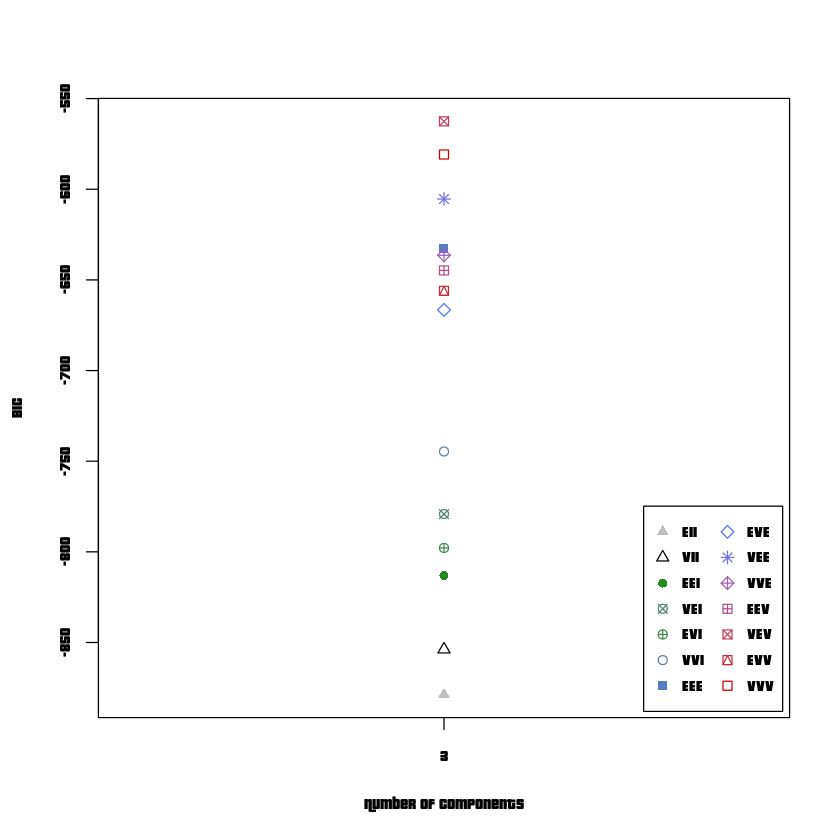

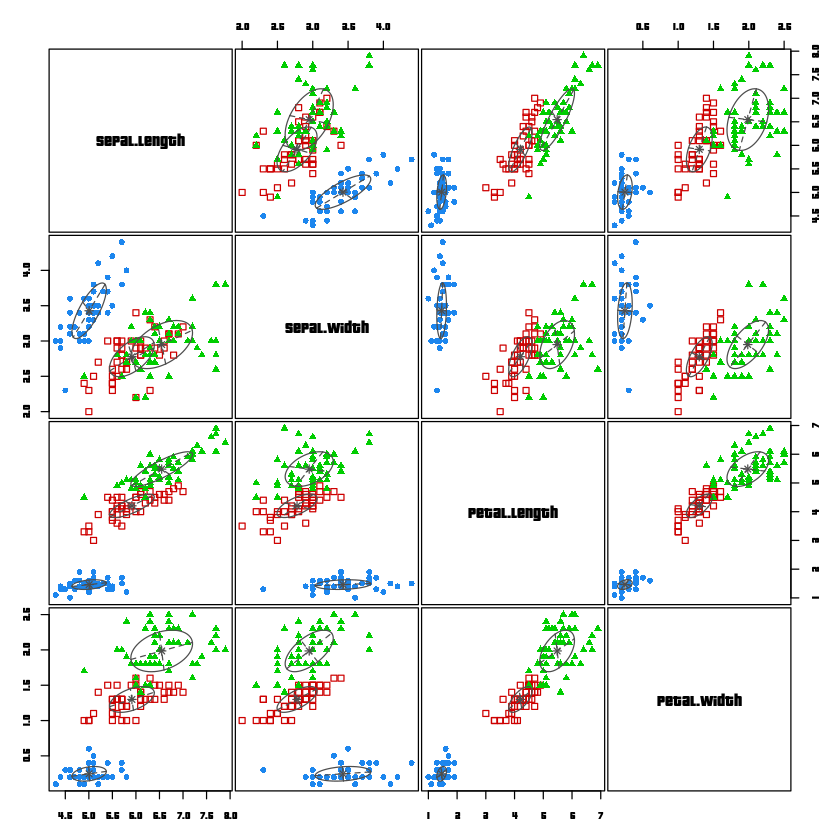

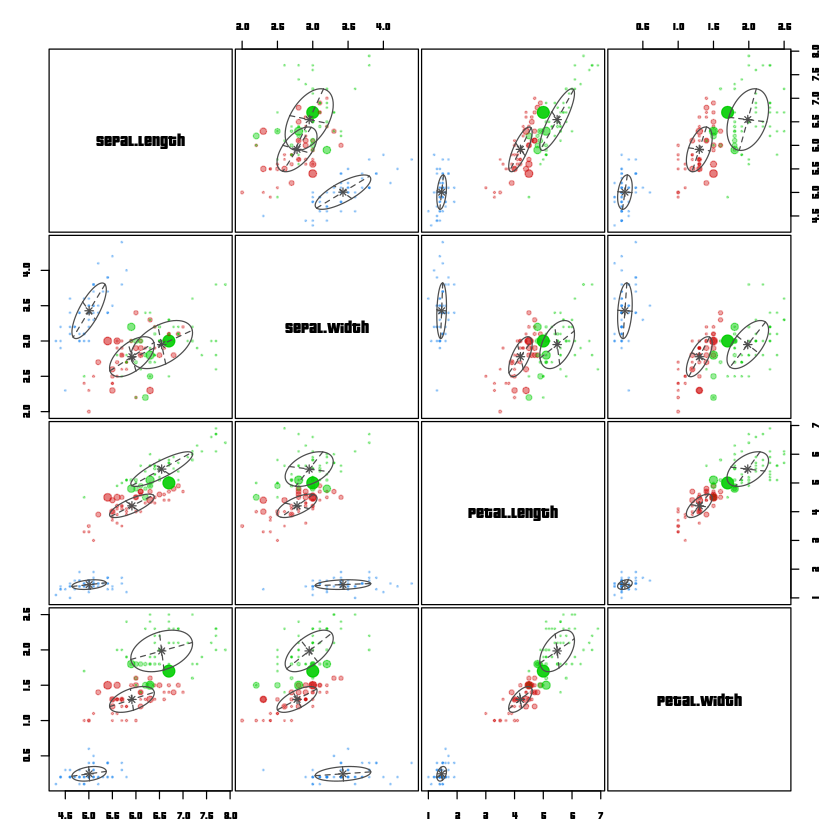

  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 3 2
 [75] 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3


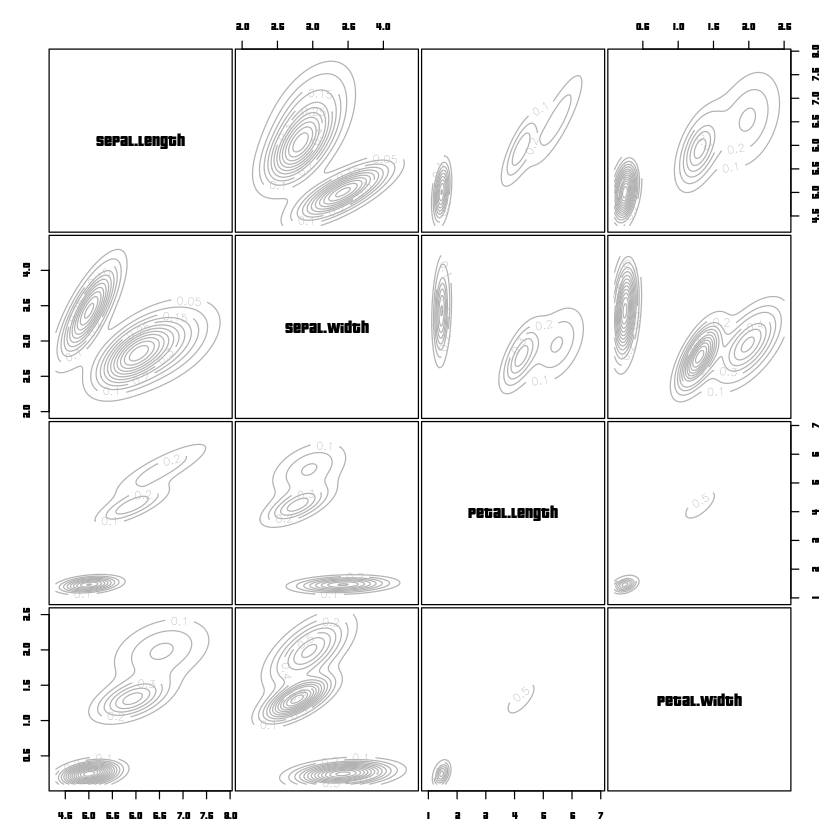

In [116]:
#GMM
iris_gmm <- Mclust(dataset,k)
plot(iris_gmm)
print(iris_gmm$classification)

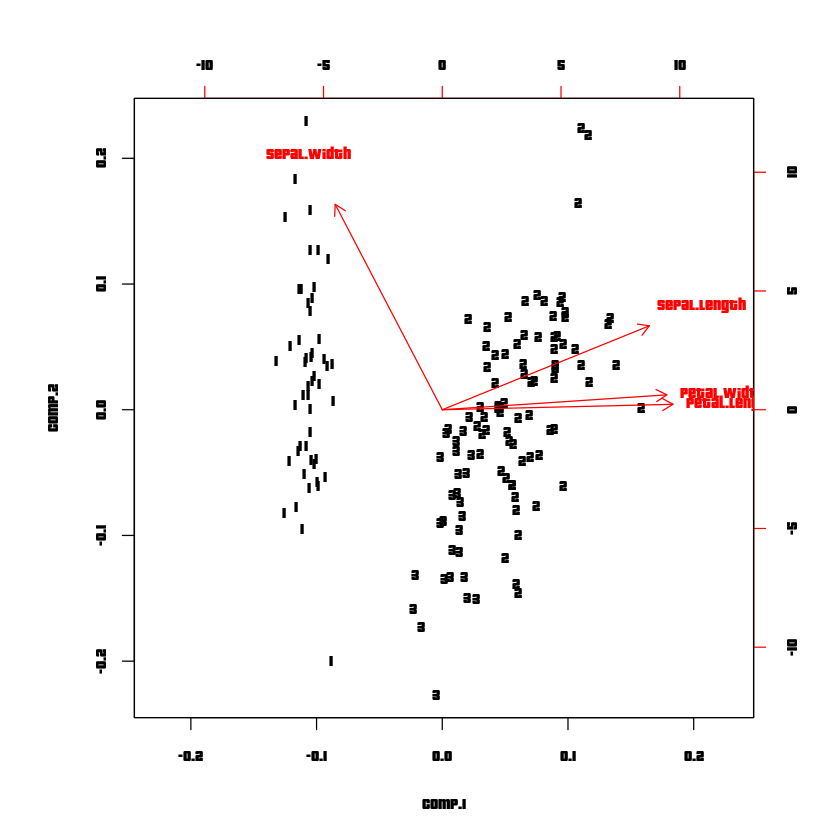

In [25]:
#Hierarchical clust
iris_hclust <- hclust(dist(dataset))
iris_comp <- princomp(dataset, cor=TRUE)
biplot(iris_comp, xlabs= cutree(iris_hclust,3))

*Kmeans* y *Hierarchical clust* tienen prácticamente los mismos componentes, sin embargo difieren en el resultado de la clasificación de las flores.
Con respecto a *GMM*, si no especificamos el número de grupos no hace una buena clasificación (sugiere que existen 2 grupos como óptimo), sin embargo, se puede apreciar bien una separación entre los tres componentes, sobre todo si se compara *sepal.width* con *petal.width* o *petal.width* con *petal.length*. Esto se condice con la distribucion observada en los gráficos de *K-means* y *Hierarchical clust*.

In [105]:
#B

#Kmeans purity
purity_kmeans <- (sum(cluster_iris$cluster[1:50]==1) + sum(cluster_iris$cluster[51:100]==3) + sum(cluster_iris$cluster[101:150]==2))/150
print(purity_kmeans)

[1] 0.8933333


In [106]:
#GMM purity
purity_GMM <- (sum(iris_gmm$classification[1:50]==1) + sum(iris_gmm$classification[51:100]==2) + sum(iris_gmm$classification[101:150]==3))/150
print(purity_GMM)

[1] 0.9666667


In [108]:
#HClust purity
ct <- cutree(iris_hclust,3)
purity_hclust <- (sum(ct[1:50]==1) + sum(ct[51:100]==3) + sum(ct[101:150]==2))/150
print(purity_hclust)

[1] 0.84


El método que tiene una pureza más alta es **GMM** con $0.97$, lo que nos indica que para este dataset(iris) los cluster tienen una alta capacidad de contener una sola clase.
El segundo método con la pureza más alta es **K-means** con $0.893$ y en tercer lugar queda **Hierarchical clust** con $0.84$